
## Data Story Telling - Predicting Life Satisfaction
***

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report , accuracy_score

In [2]:
df=pd.read_csv('BLI.CSV',encoding=' ISO-8859-1')
df.head()

Country  Dwellings without basic facilities  Housing expenditure  \
0  Australia                                 NaN                 19.4   
1    Austria                                 0.8                 20.8   
2    Belgium                                 0.7                 20.0   
3     Canada                                 0.2                 22.9   
4      Chile                                 9.4                 18.4   

   Rooms per person  disposable income  household net wealth  \
0               NaN            37433.0              528768.0   
1               1.6            37001.0              309637.0   
2               2.1            34884.0              447607.0   
3               2.6            34421.0              478240.0   
4               1.9                NaN              135787.0   

   labour market insecurity  employment rate  unemployment rate  \
0                       3.1               73                1.0   
1                       2.3               72                1.3   
2                       2.4               65                2.3   
3                       3.8               70                0.5   
4                       7.0               56                NaN   

   personal earnings  ...  water quality  stakeholder engagement   \
0            55206.0  ...             92                      2.7   
1            53132.0  ...             92                      1.3   
2            54327.0  ...             79                      2.0   
3            55342.0  ...             90                      2.9   
4            26729.0  ...             62                      1.3   

   voter turnout  life expectancy  self reported health  life satisfaction  \
0             92             83.0                  85.0                7.1   
1             76             82.0                  71.0                7.2   
2             88             82.1                  74.0                6.8   
3             68             82.1                  89.0                7.0   
4             47             80.6                  60.0                6.2   

   feeling safe  homicide rate  working hours  personal time  
0            67            0.9           12.5          14.36  
1            86            0.5            5.3          14.51  
2            56            1.1            4.3          15.52  
3            78            1.2            3.3          14.57  
4            41            2.4            7.7            NaN  

[5 rows x 25 columns]

In [3]:
df.describe()

Dwellings without basic facilities  Housing expenditure  \
count                           38.000000            37.000000   
mean                             4.294737            20.345946   
std                              7.589180             2.513474   
min                              0.000000            14.700000   
25%                              0.200000            18.400000   
50%                              0.650000            20.100000   
75%                              5.500000            21.800000   
max                             35.900000            27.400000   

       Rooms per person  disposable income  household net wealth  \
count         38.000000          35.000000             29.000000   
mean           1.657895       29573.114286         323959.620690   
std            0.422753        8880.424174         185528.628032   
min            1.000000        9338.000000          79245.000000   
25%            1.250000       23729.500000         188627.000000   
50%            1.700000       29431.000000         294735.000000   
75%            1.900000       34934.000000         370341.000000   
max            2.600000       51147.000000         941162.000000   

       labour market insecurity  employment rate  unemployment rate  \
count                 33.000000        41.000000          39.000000   
mean                   5.269697        67.682927           2.135897   
std                    4.336220         8.818841           3.194937   
min                    1.000000        39.000000           0.000000   
25%                    2.700000        65.000000           0.850000   
50%                    4.000000        70.000000           1.200000   
75%                    5.900000        74.000000           2.250000   
max                   21.700000        80.000000          17.900000   

       personal earnings  quality of support network  ...  water quality  \
count          35.000000                   41.000000  ...      41.000000   
mean        43783.571429                   90.780488  ...      83.317073   
std         13953.095782                    5.382900  ...       9.719668   
min         16230.000000                   77.000000  ...      62.000000   
25%         31265.500000                   89.000000  ...      78.000000   
50%         45269.000000                   93.000000  ...      83.000000   
75%         54766.500000                   95.000000  ...      91.000000   
max         69392.000000                   98.000000  ...      98.000000   

       stakeholder engagement   voter turnout  life expectancy  \
count                39.000000      41.000000        41.000000   
mean                  2.151282      69.268293        80.260976   
std                   0.572562      12.167630         3.845249   
min                   1.200000      45.000000        64.200000   
25%                   1.750000      63.000000        78.600000   
50%                   2.200000      68.000000        81.700000   
75%                   2.550000      78.000000        82.900000   
max                   3.200000      92.000000        84.400000   

       self reported health  life satisfaction  feeling safe  homicide rate  \
count             39.000000          41.000000     41.000000      41.000000   
mean              67.948718           6.600000     72.073171       3.290244   
std               13.580072           0.725259     14.299284       6.251792   
min               34.000000           4.900000     40.000000       0.200000   
25%               61.000000           6.100000     66.000000       0.500000   
50%               71.000000           6.500000     76.000000       0.900000   
75%               75.500000           7.200000     82.000000       1.900000   
max               89.000000           7.900000     93.000000      26.800000   

       working hours  personal time  
count      39.000000      22.000000  
mean        7.189744      15.069091  
std         7.199481       0.607343  
min         0.1

# About the Data -
The data is sourced from the OECD (Organisation for Economic- Cooperation and Development). They are an organisation of mainly 38 countries and they collect data on a range of variables from general indicators like the GDP to even specific ones like
households with a broadband connection.<br>
This dataset specifically is the BETTER LIFE INDEX dataset, which is a way to measure the well-being of countries, using 11 dimensions, each with different indicators, it covers both qualitative and quantitative aspects as we can see above, we have taken all the indicators of the dataset.The Better Life Index was made to overcome the limitations of GDP in assessing the qualitative aspects of well-being and hence, impacting policy making. Since, the policies will only be made for things which are being measured and analysed. <br>
The data is for 41 countries and it is published by the OECD for 2021

In [4]:
df.isnull().sum()

Country                                0
Dwellings without basic facilities     3
Housing expenditure                    4
Rooms per person                       3
disposable income                      6
household net wealth                  12
labour market insecurity               8
employment rate                        0
unemployment rate                      2
personal earnings                      6
quality of support network             0
educational attainment                 1
student skills                         2
years in education                     2
air pollution                          0
water quality                          0
stakeholder engagement                 2
voter turnout                          0
life expectancy                        0
self reported health                   2
life satisfaction                      0
feeling safe                           0
homicide rate                          0
working hours                          2
personal time   

# EDA + Feature Selection

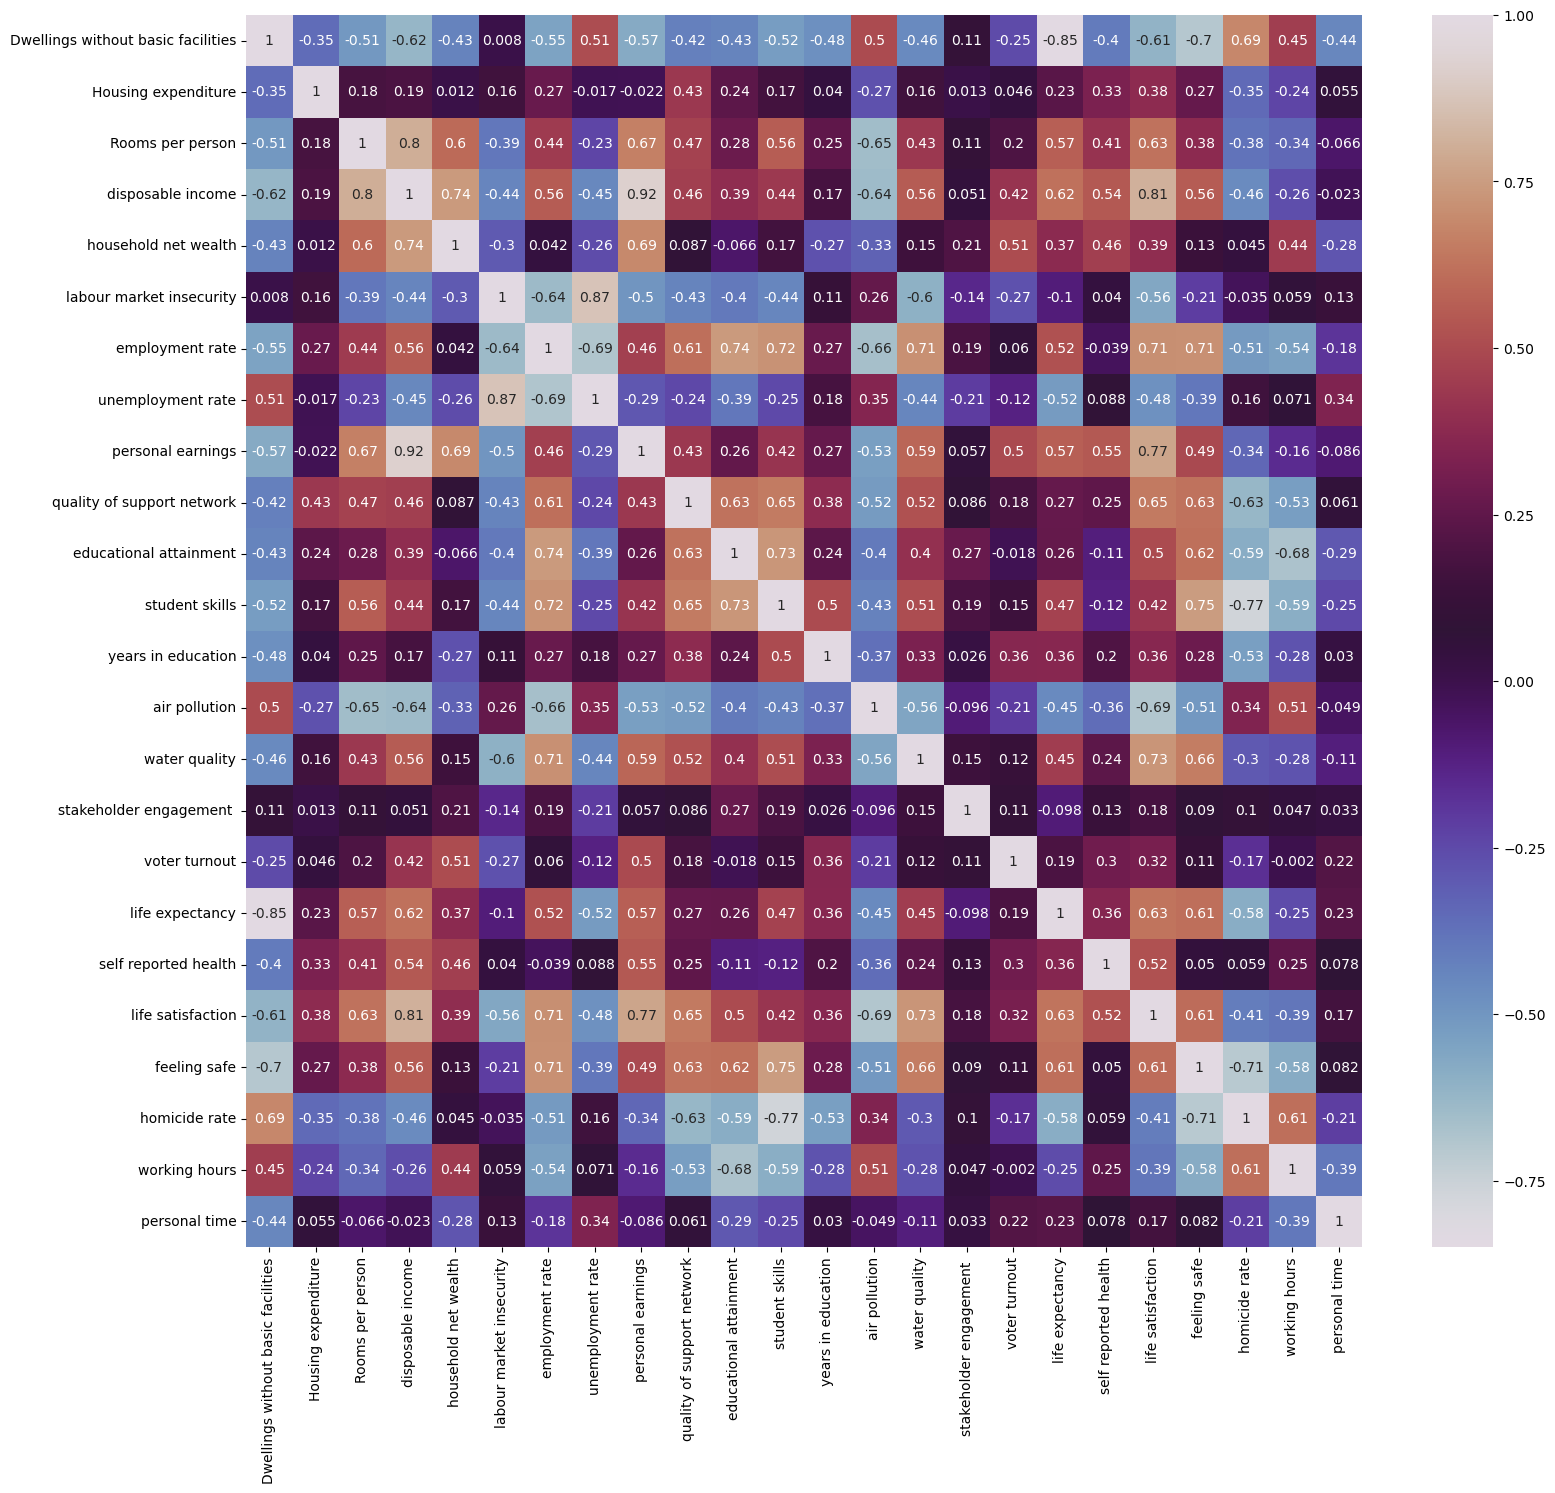

In [5]:
plt.figure(figsize=(18, 16))
sns.heatmap(df.corr(),annot=True,cmap='twilight')
plt.show()

Life satisfaction is correlated with <br>
1. dwellings without basic facilities (-0.61)
2. rooms per person (0.63)
3. disposable income (0.81)
4. employment rate (0.71)
5. personal earnings (0.77)
6. quality of support network (0.65)
7. air pollution (-0.69)
8. water quality (0.73)
9. life expectancy (0.63)
10. feeling safe (0.61)

Also, there is high negative collinearity(0.85) between life expectancy and dwellings without basic facilities, this is  an indication that living conditions, as measured by the availability of basic facilities, have a significant impact on life expectancy, that is, good living conditions contribute to a longer life. <br>
Dwellings without basic facilities is also positively correlated with disposable income and negatively correlated with feeling safe.
<br><br>
Unemployment rate and labour market insecurity also have a positive correlation coefficient of 0.87,indicating that when the unemployment rate is high, individuals in the labour market are likely to feel more insecure about their job situation. <br><br>
There is a correlation of 0.8 between rooms per person and disposable income, indicating that, people with more disposable income have better living conditions.Hence, there is a positive correlation of 0.6 between househld net wealth and rooms per persons too due to the same reason. <br><br>
There is a negative correlation of 0.77 between homicide rate and student skills, which indiactes that as student skills increase, the homicide rate tends to decrease,in areas where students have higher skills, the homicide rate is likely to be lower. <br><br>
But only life satisfaction has alot of variables which are highly correlated with it, hence life satisfaction prediction will be possible.

One might think that the variables like, Labour Market insecurity,Educational Attainment, Student skills, years in education, working hours and personal time would have a high impact on life satisfaction, but from the above dataset it is evident that they don't have a big impact on life satisfaction.

In [6]:
life=df[['Country','Dwellings without basic facilities','Rooms per person','disposable income','employment rate','personal earnings','quality of support network','air pollution','water quality','life expectancy','feeling safe','life satisfaction']]
life.head()

Country  Dwellings without basic facilities  Rooms per person  \
0  Australia                                 NaN               NaN   
1    Austria                                 0.8               1.6   
2    Belgium                                 0.7               2.1   
3     Canada                                 0.2               2.6   
4      Chile                                 9.4               1.9   

   disposable income  employment rate  personal earnings  \
0            37433.0               73            55206.0   
1            37001.0               72            53132.0   
2            34884.0               65            54327.0   
3            34421.0               70            55342.0   
4                NaN               56            26729.0   

   quality of support network  air pollution  water quality  life expectancy  \
0                          93            6.7             92             83.0   
1                          92           12.2             92             82.0   
2                          90           12.8             79             82.1   
3                          93            7.1             90             82.1   
4                          88           23.4             62             80.6   

   feeling safe  life satisfaction  
0            67                7.1  
1            86                7.2  
2            56                6.8  
3            78                7.0  
4            41                6.2

In [7]:
life.isnull().sum()

Country                               0
Dwellings without basic facilities    3
Rooms per person                      3
disposable income                     6
employment rate                       0
personal earnings                     6
quality of support network            0
air pollution                         0
water quality                         0
life expectancy                       0
feeling safe                          0
life satisfaction                     0
dtype: int64

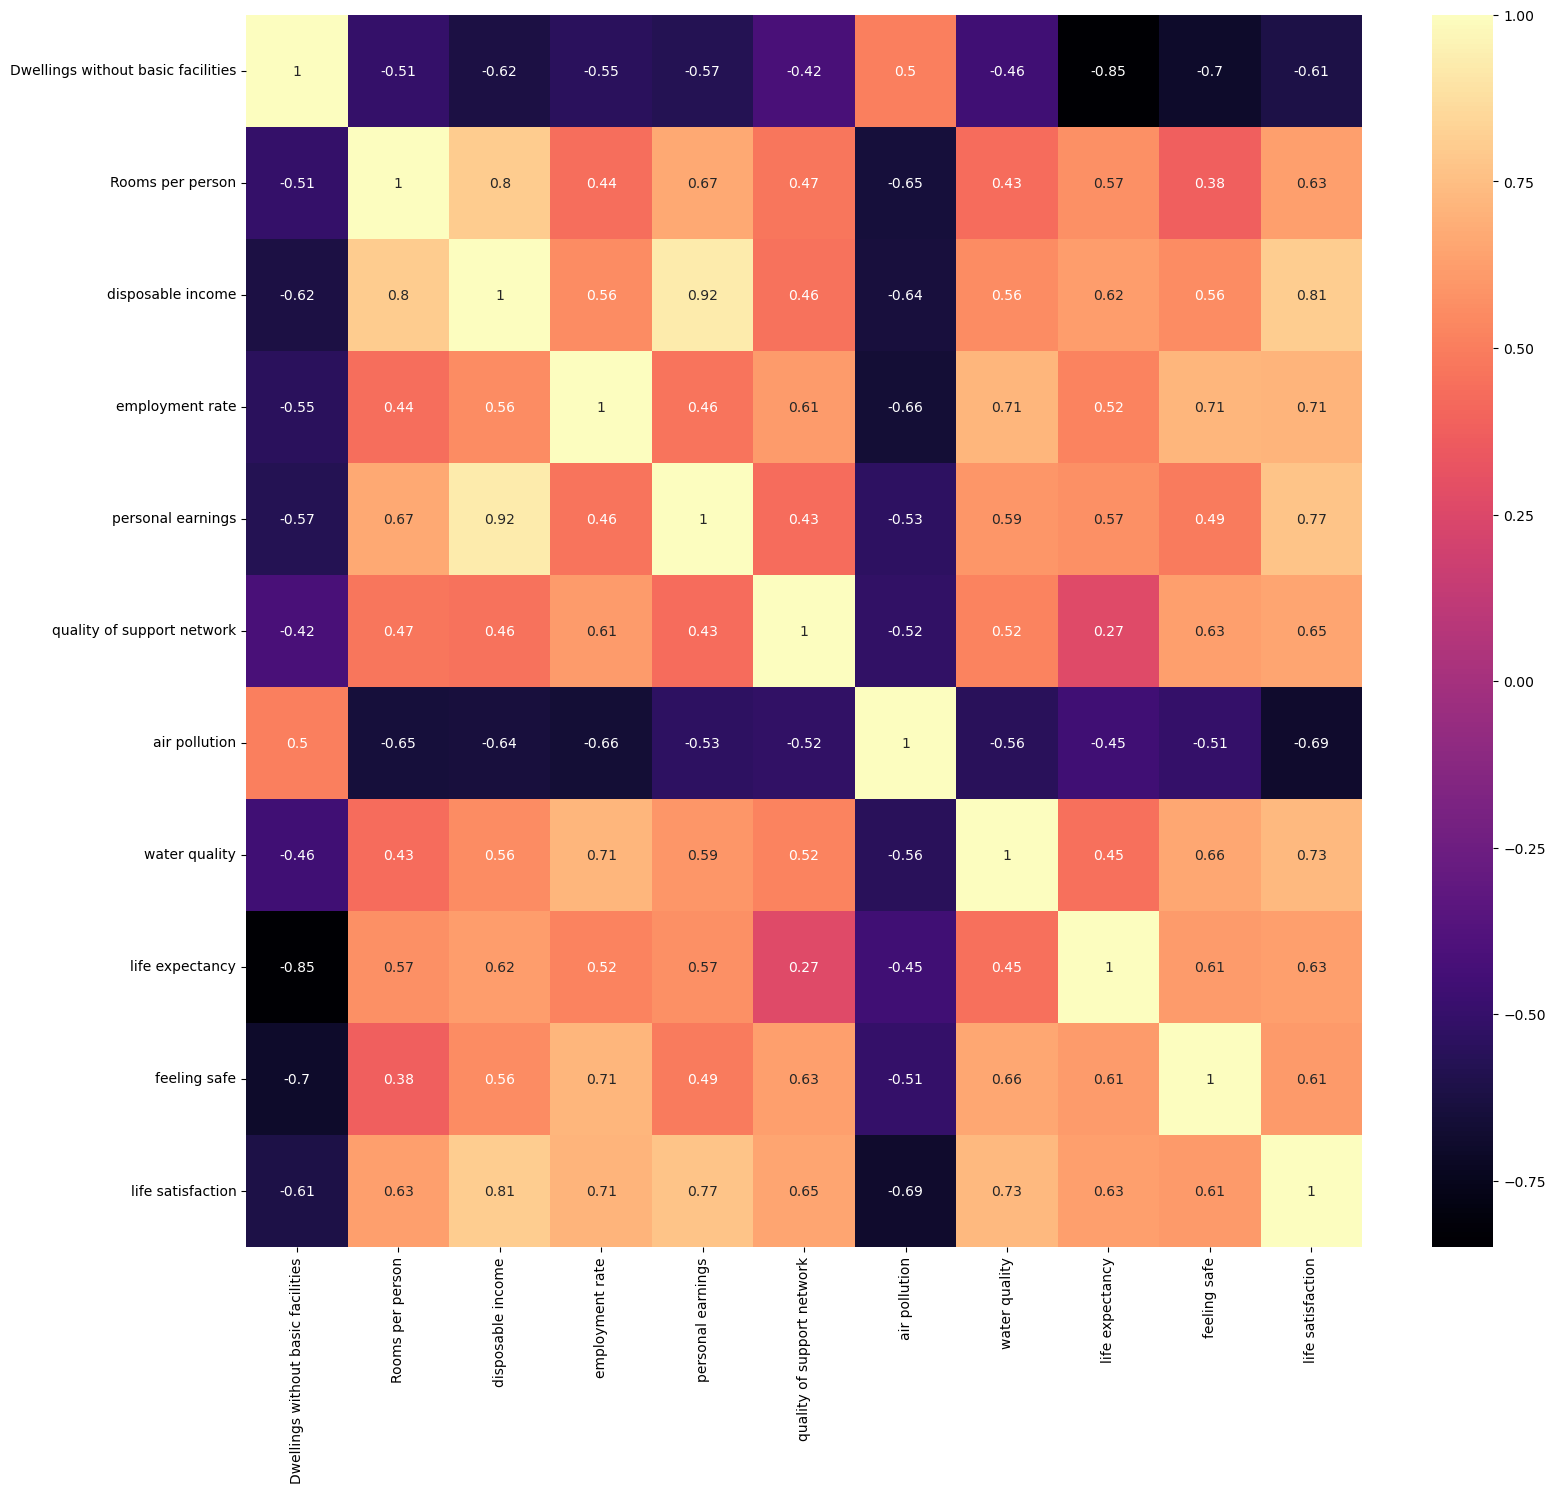

In [8]:
plt.figure(figsize=(18, 16))
sns.heatmap(life.corr(),annot=True,cmap='magma')
plt.show()

There is multicollinearity between , dwellings and life expectancy, disposable income and personal earnings. <br>
To avoid the problem of multicollinearity, we need to drop some variables. <br>
Between dwellings and life expectancy, we can drop dwellings since there are 3 missing values in that variable.<br>
Between disposable income and personal earnings, choosing disposable income is more apt since disposable income has a higher correlation with life satisfaction (0.81) as compared to personal earnings (0.77).

In [9]:
life.drop(['personal earnings','Dwellings without basic facilities'],axis=1,inplace=True)
life.head()

C:\Users\geete\AppData\Local\Temp\ipykernel_5860\3866853526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life.drop(['personal earnings','Dwellings without basic facilities'],axis=1,inplace=True)


Country  Rooms per person  disposable income  employment rate  \
0  Australia               NaN            37433.0               73   
1    Austria               1.6            37001.0               72   
2    Belgium               2.1            34884.0               65   
3     Canada               2.6            34421.0               70   
4      Chile               1.9                NaN               56   

   quality of support network  air pollution  water quality  life expectancy  \
0                          93            6.7             92             83.0   
1                          92           12.2             92             82.0   
2                          90           12.8             79             82.1   
3                          93            7.1             90             82.1   
4                          88           23.4             62             80.6   

   feeling safe  life satisfaction  
0            67                7.1  
1            86                7.2  
2            56                6.8  
3            78                7.0  
4            41                6.2

# Data Cleaning

In [10]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     41 non-null     object 
 1   Rooms per person            38 non-null     float64
 2   disposable income           35 non-null     float64
 3   employment rate             41 non-null     int64  
 4   quality of support network  41 non-null     int64  
 5   air pollution               41 non-null     float64
 6   water quality               41 non-null     int64  
 7   life expectancy             41 non-null     float64
 8   feeling safe                41 non-null     int64  
 9   life satisfaction           41 non-null     float64
dtypes: float64(5), int64(4), object(1)
memory usage: 3.3+ KB


The data types in all of the columns are correct and hence no change is needed. Also our dependent variable (life satisfaction) is an ordinal variable. <br>
There are a few missing values in the first two columns, we cannot afford to drop those columns since they have a good correlation with our dependent variable and only a few rows are missings so we can impute those values. <br>
During feature selection and exploratory data analysis done before, we notice that there is a strong postive correlation between "Rooms per person" and "disposable income" , therefore as the disposable income rises , the rooms per person should also increase. In order to fill missing values using this fact, we have to use a linear regression model. <br>
But to fill missing values in the "disposable income" variable we will use the mean or median depending upon its distribution and presence of outliers

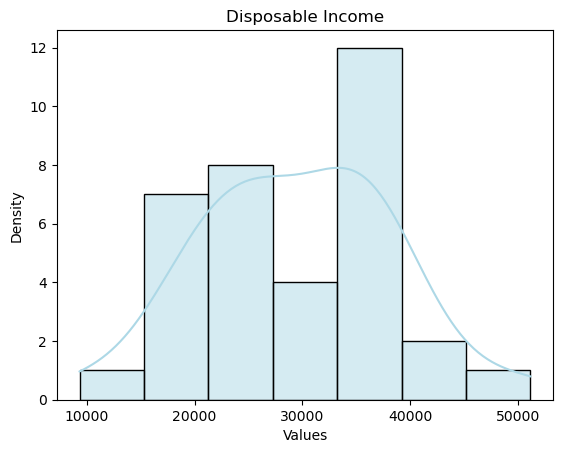

In [11]:
data=life['disposable income']
sns.histplot(data, color='lightblue', edgecolor='black',kde=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Disposable Income')
plt.show()

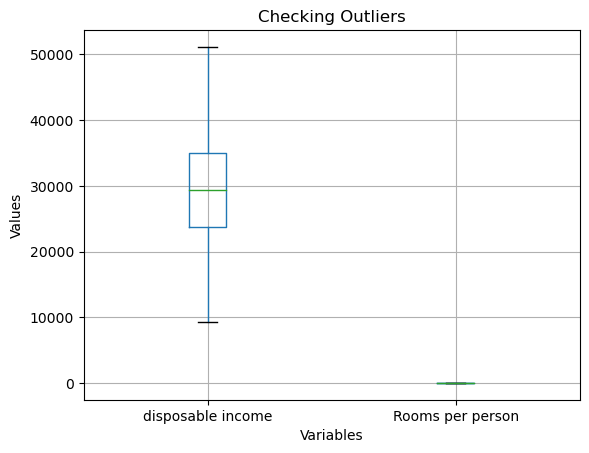

In [12]:
life.boxplot(column=['disposable income','Rooms per person'])
plt.title('Checking Outliers')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()

Since, it is not normally distributed and there are two outliers, its better to replace the null values using the median of the data.

In [13]:
life['disposable income'].fillna(life['disposable income'].median(),inplace=True)

C:\Users\geete\AppData\Local\Temp\ipykernel_5860\1945999061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life['disposable income'].fillna(life['disposable income'].median(),inplace=True)


In [14]:
life.isnull().sum()

Country                       0
Rooms per person              3
disposable income             0
employment rate               0
quality of support network    0
air pollution                 0
water quality                 0
life expectancy               0
feeling safe                  0
life satisfaction             0
dtype: int64

Making the Linear regression model to fill values in the "rooms per person" variable

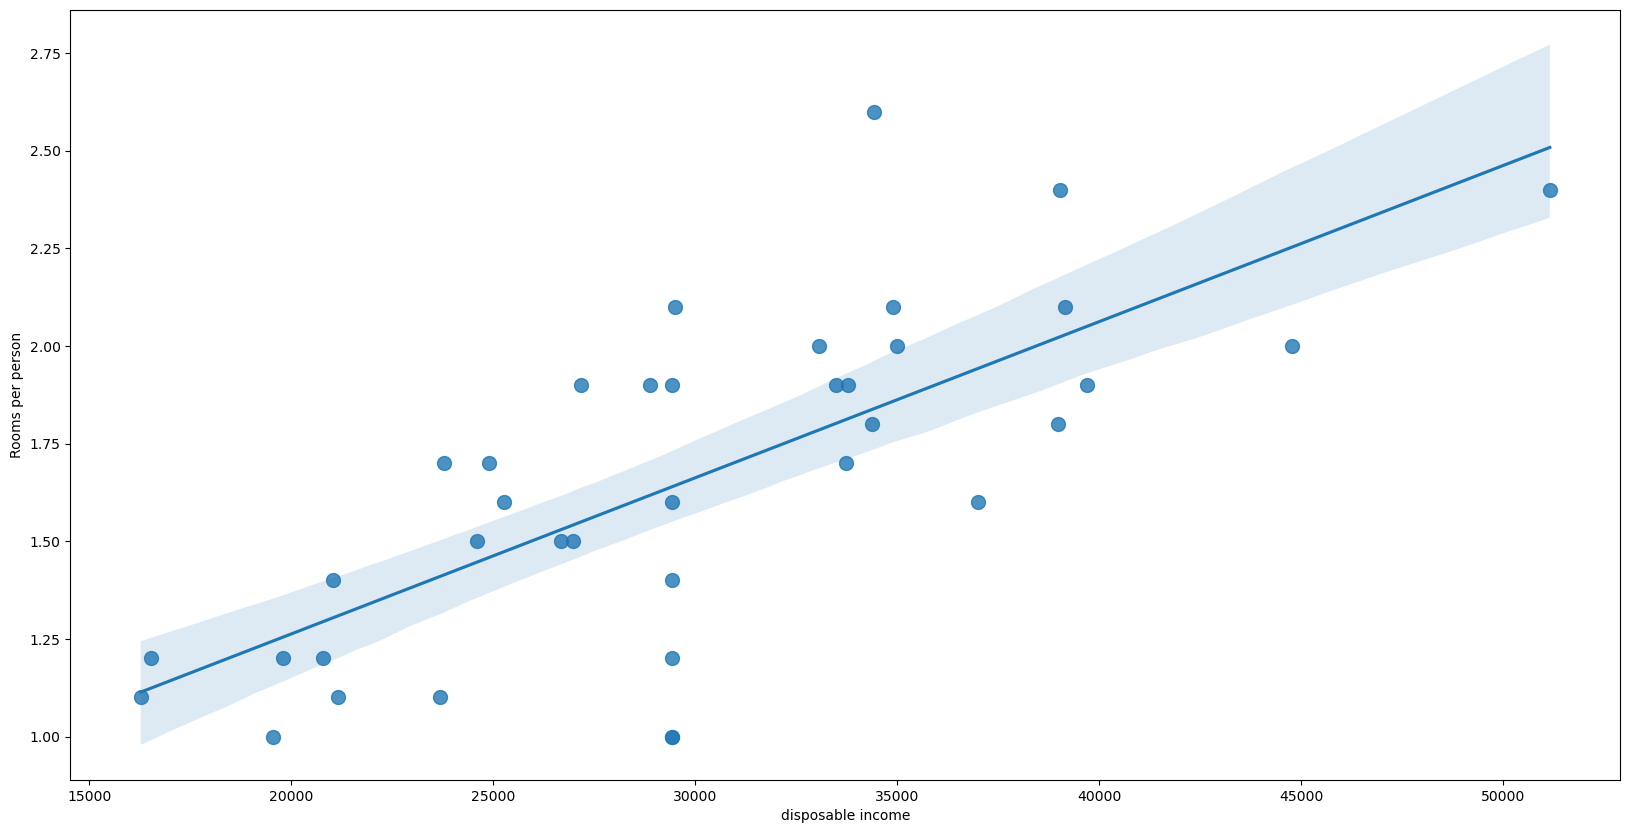

In [15]:
plt.figure(figsize=(20,10))
sns.regplot(x=life['disposable income'], y=life['Rooms per person'], scatter_kws={'s':100})
plt.show()

In [16]:
subset= life[['disposable income', 'Rooms per person']]
subset = subset.dropna()
X1=subset[['disposable income']]
y1=subset[['Rooms per person']]
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=0)
lr=LinearRegression().fit(X1_train,y1_train)

missing_values_mask = life['Rooms per person'].isnull()
X1_missing = life.loc[missing_values_mask, 'disposable income'].values.reshape(-1, 1)
predicted_values = lr.predict(X1_missing)

life.loc[missing_values_mask, 'Rooms per person'] = predicted_values

C:\Users\geete\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [17]:
life.head()

Country  Rooms per person  disposable income  employment rate  \
0  Australia           1.99952            37433.0               73   
1    Austria           1.60000            37001.0               72   
2    Belgium           2.10000            34884.0               65   
3     Canada           2.60000            34421.0               70   
4      Chile           1.90000            29431.0               56   

   quality of support network  air pollution  water quality  life expectancy  \
0                          93            6.7             92             83.0   
1                          92           12.2             92             82.0   
2                          90           12.8             79             82.1   
3                          93            7.1             90             82.1   
4                          88           23.4             62             80.6   

   feeling safe  life satisfaction  
0            67                7.1  
1            86                7.2  
2            56                6.8  
3            78                7.0  
4            41                6.2

In [18]:
# Now there are no missing values
life.isnull().sum()

Country                       0
Rooms per person              0
disposable income             0
employment rate               0
quality of support network    0
air pollution                 0
water quality                 0
life expectancy               0
feeling safe                  0
life satisfaction             0
dtype: int64

# EDA

<AxesSubplot:xlabel='life satisfaction', ylabel='count'>

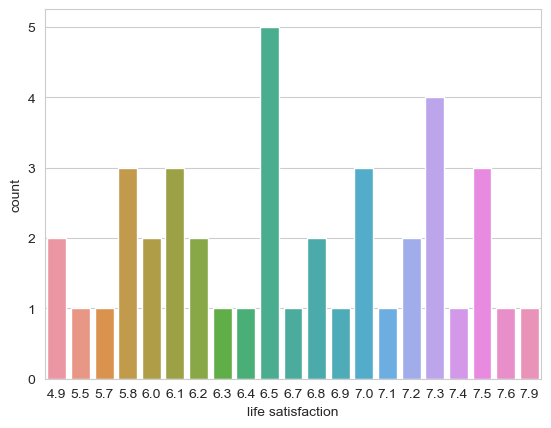

In [19]:
sns.set_style("whitegrid")
sns.countplot(x='life satisfaction',data=life)

The most frequent life satisfaction score is 6.5, followed by 7.3 and highest is 7.9

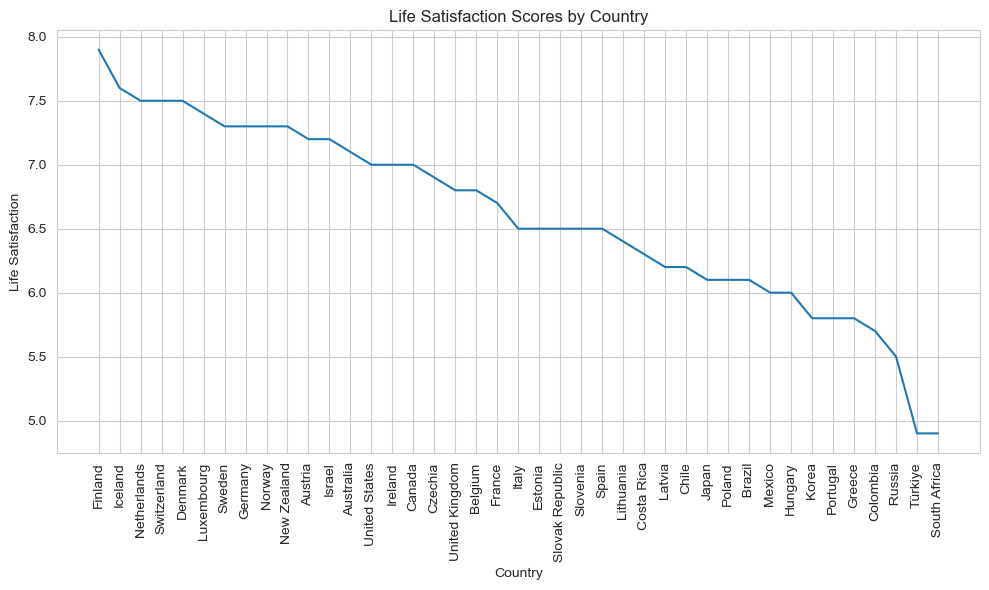

In [20]:
sorted_country = life.sort_values(by='life satisfaction', ascending=False)
plt.figure(figsize=(10, 6))
plt.plot(sorted_country['Country'], sorted_country['life satisfaction'],)
plt.title('Life Satisfaction Scores by Country')
plt.xlabel('Country')
plt.ylabel('Life Satisfaction')
plt.xticks(rotation=90)  
plt.grid(True)
plt.tight_layout()
plt.show()

The country with the highest score is Finland while the country with the lowest score is South Africa.

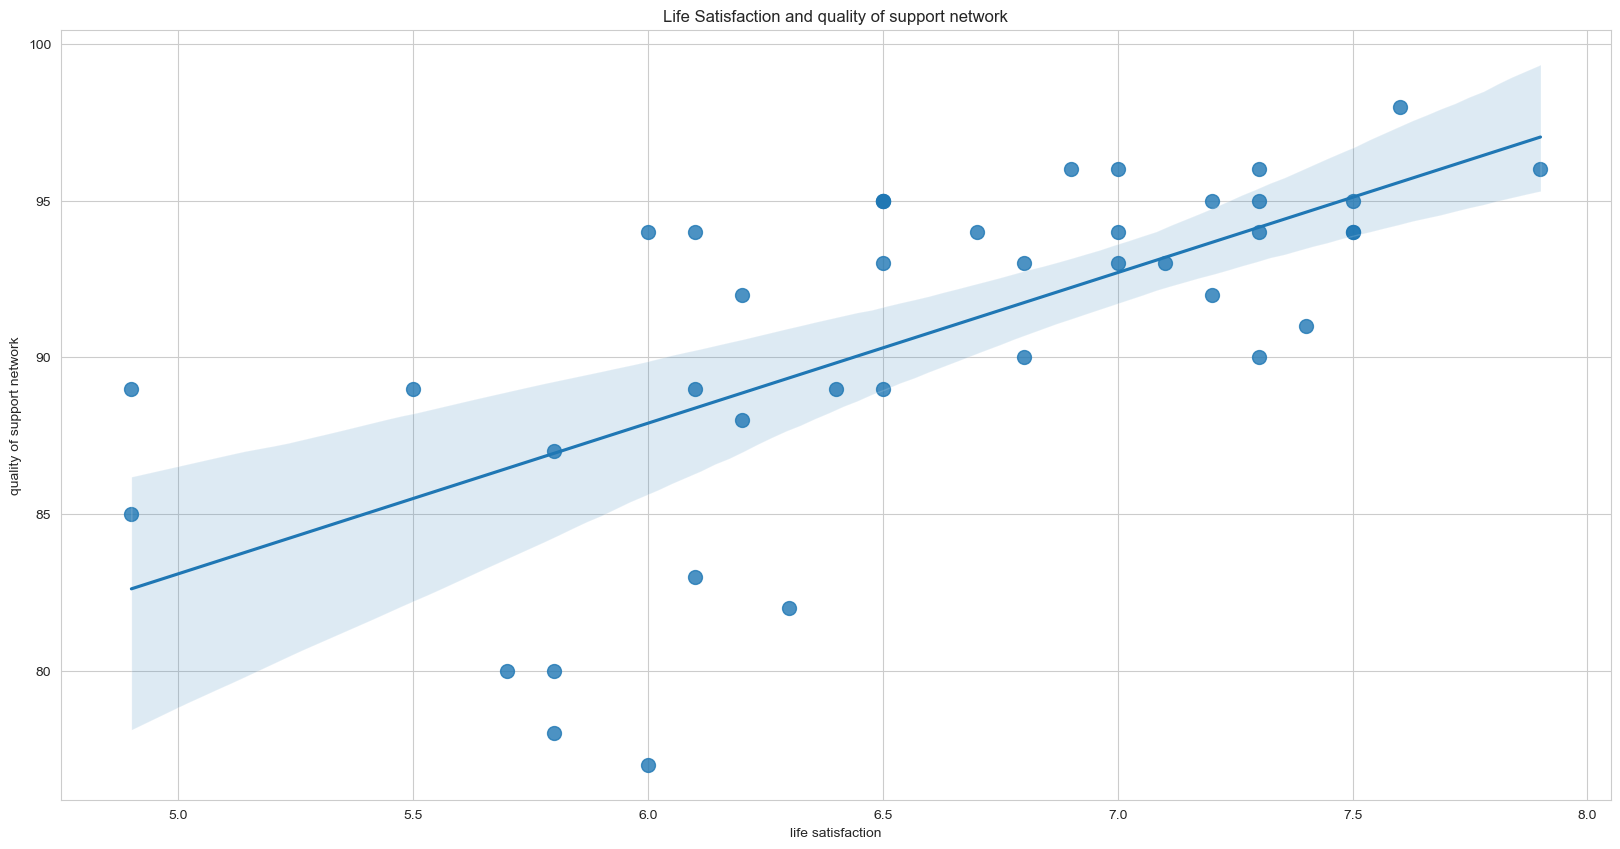

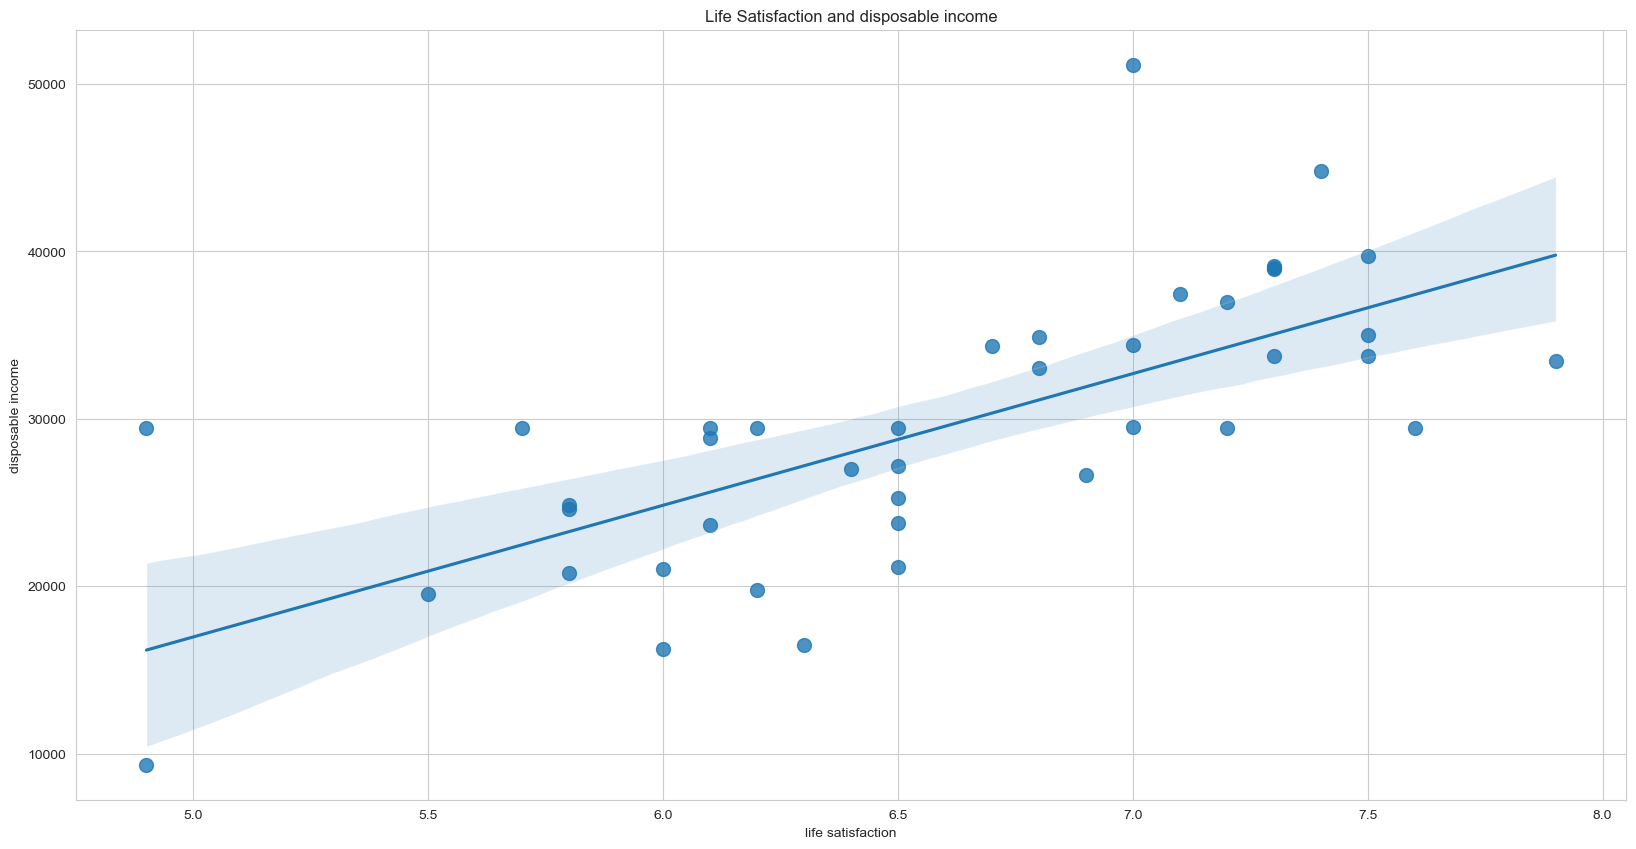

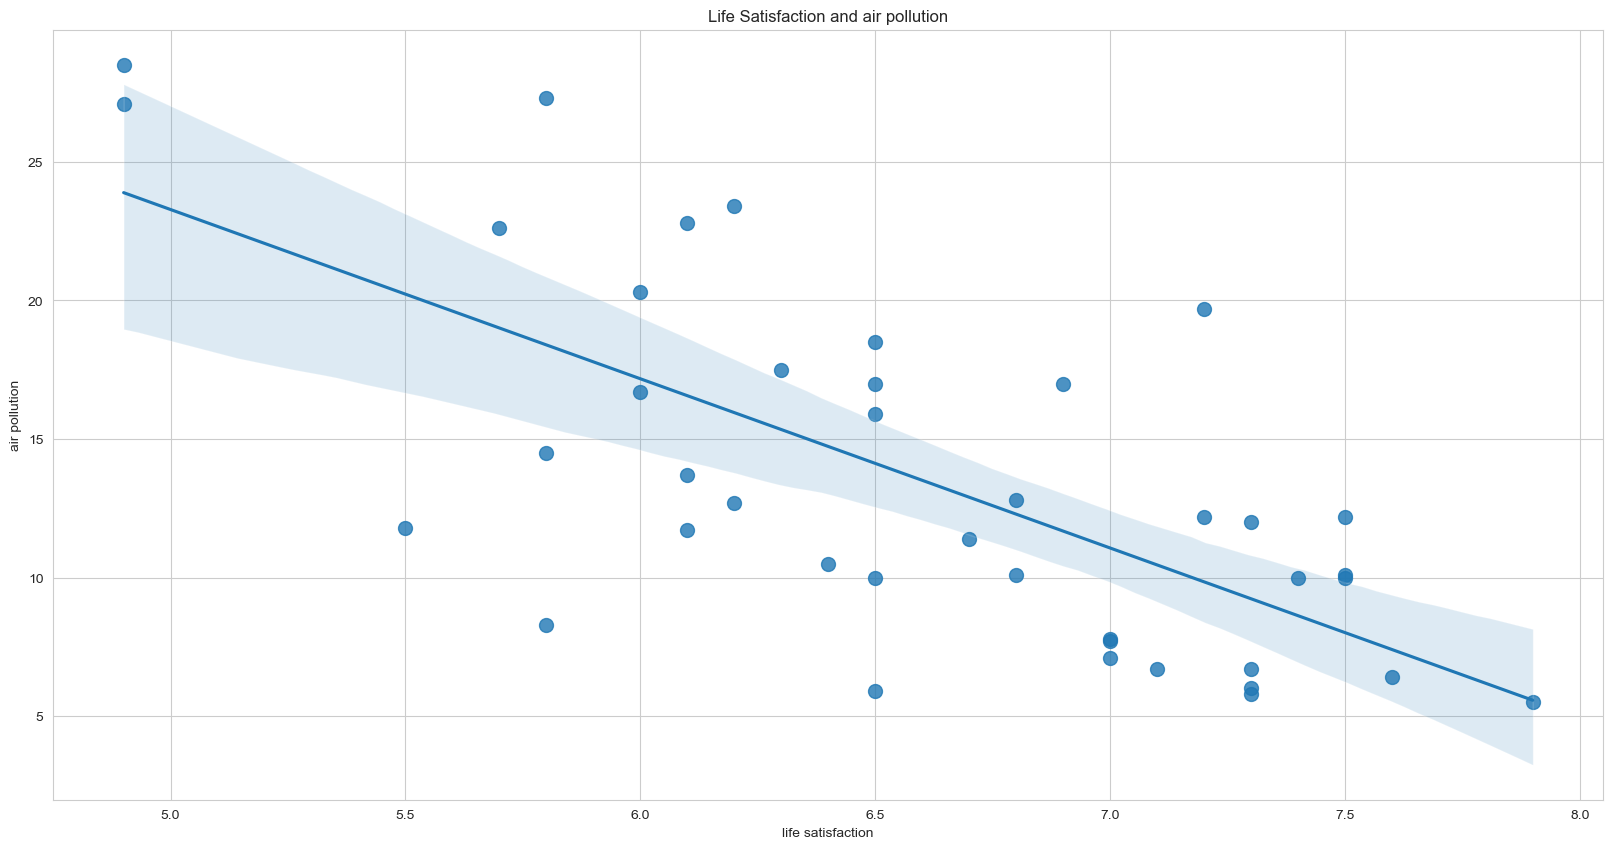

<Figure size 640x480 with 0 Axes>

In [21]:
plt.figure(figsize=(20,10))
sns.regplot(x=life['life satisfaction'], y=life['quality of support network'], scatter_kws={'s':100})
plt.title('Life Satisfaction and quality of support network')
plt.show()

plt.figure(figsize=(20,10))
sns.regplot(x=life['life satisfaction'], y=life['disposable income'], scatter_kws={'s':100})
plt.title('Life Satisfaction and disposable income')
plt.show()

plt.figure(figsize=(20,10))
sns.regplot(x=life['life satisfaction'], y=life['air pollution'], scatter_kws={'s':100})
plt.title('Life Satisfaction and air pollution')
plt.show()

plt.tight_layout()
plt.show()

From the above graphs we can see that the relationship between life satisfaction and water quality is positive, it is also positive with disposable income, but the relationship with air pollution is negative. <br><br>
Since, water quality has a high correlation (0.73), lets see its impact on life satisfaction graphically.

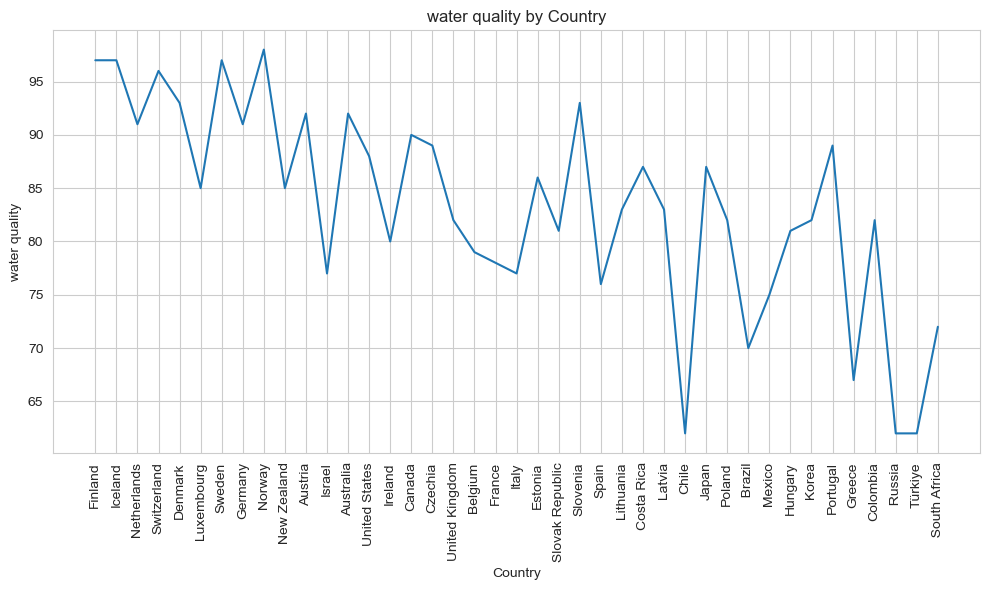

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(sorted_country['Country'], sorted_country['water quality'])
plt.title('water quality by Country')
plt.xlabel('Country')
plt.ylabel('water quality')
plt.xticks(rotation=90)  
plt.grid(True)
plt.tight_layout()
plt.show()

The above countries are in the descending order of their life satisfaction, we can notice that Finland and Norway have the highest water quality and their life satisfaction is also high. <br>
Chile, Russia and Turkiye have the lowest water quality and also low life satisfaction.

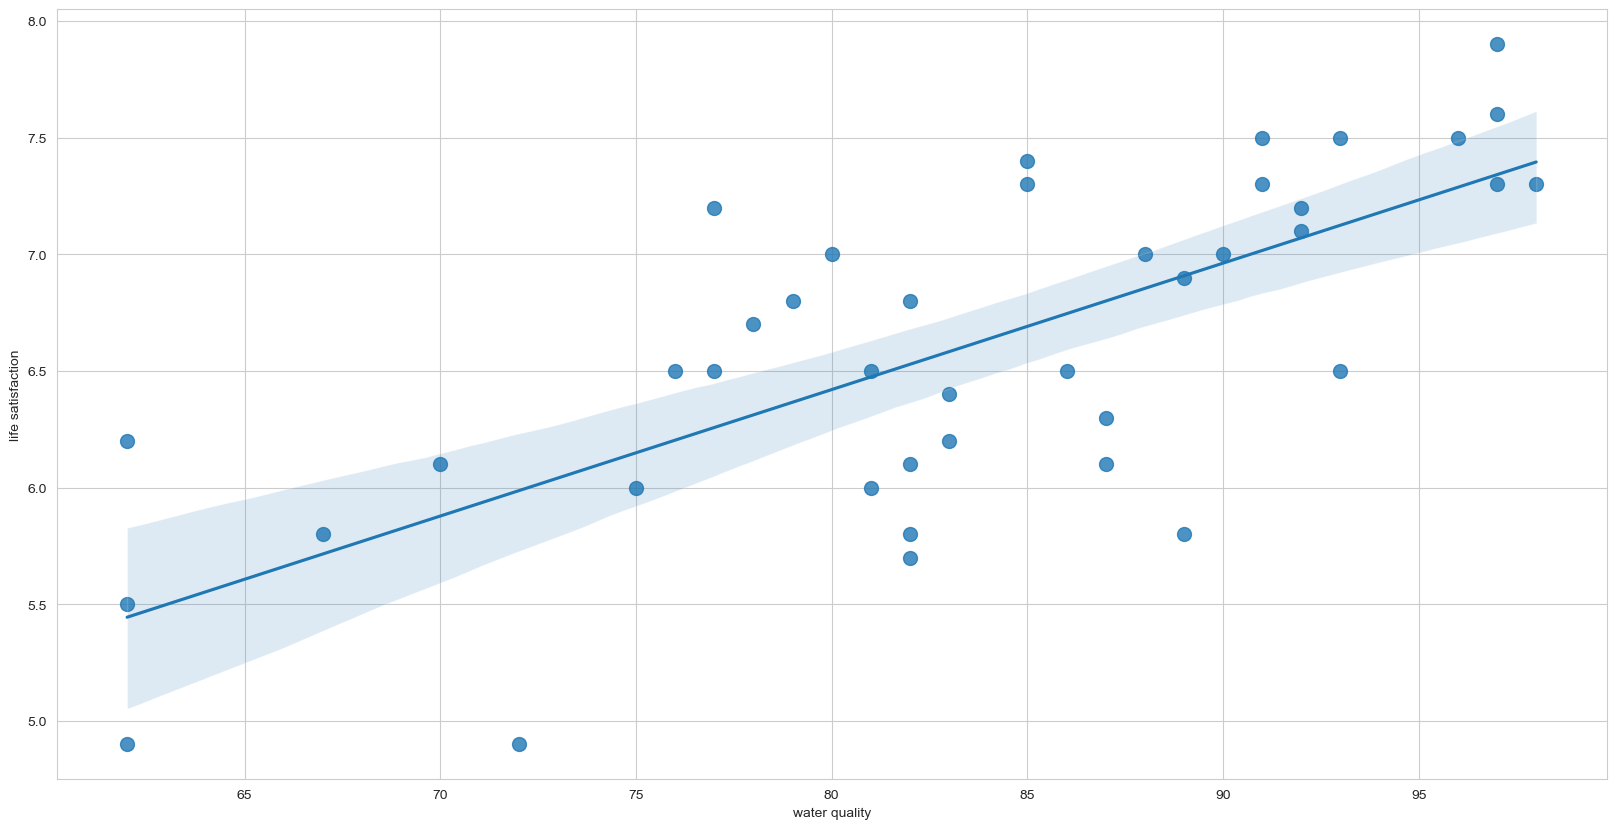

In [23]:
plt.figure(figsize=(20,10))
sns.regplot(x=life['water quality'], y=life['life satisfaction'], scatter_kws={'s':100})
plt.show()

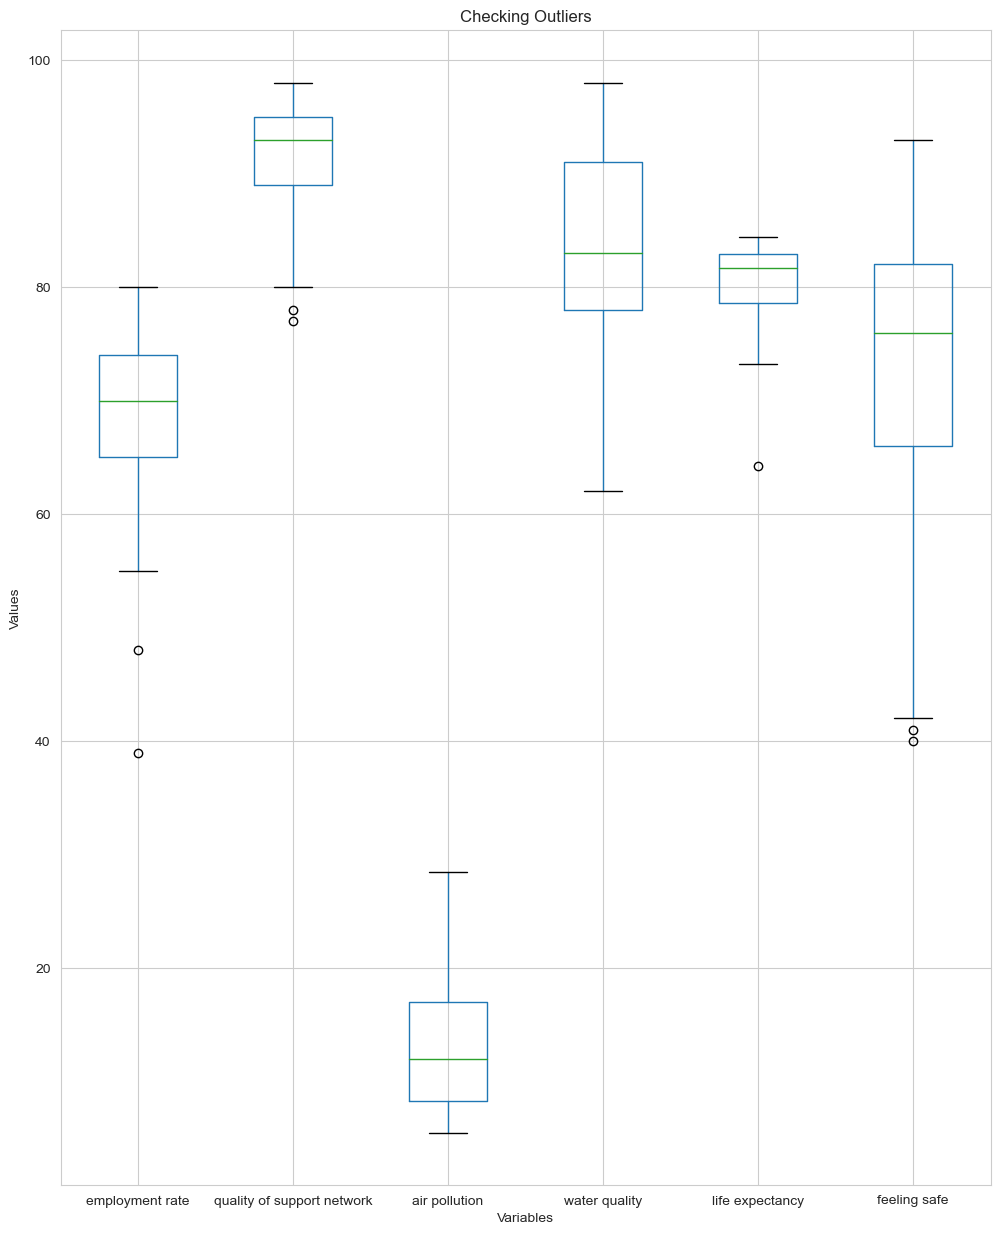

In [24]:
plt.figure(figsize=(12,15))
life.boxplot(column=['employment rate','quality of support network','air pollution','water quality','life expectancy','feeling safe'])
plt.title('Checking Outliers')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()

In [25]:
#analysing the outliers
q75, q25 = np.percentile(life['employment rate'], [75, 25])
iqr = q75 - q25
whisker = q25 - (iqr * 1.5)

median = life['employment rate'].median()

#printing the outliers
print(df.loc[life['employment rate'] < whisker, ['Country','employment rate']])
print('The median employment rate is',median)

           Country  employment rate
35         Türkiye               48
40    South Africa               39
The median employment rate is 70.0


The life satisfaction scores in Turkiye and South Africa are the lowest and above we have found that they are also outliers in the employment rate as it is very low. Therefore, this must be a highly contributing factor for the lower life satisfaction in these countries.

# Data Preprocessing

In [26]:
life.head()

Country  Rooms per person  disposable income  employment rate  \
0  Australia           1.99952            37433.0               73   
1    Austria           1.60000            37001.0               72   
2    Belgium           2.10000            34884.0               65   
3     Canada           2.60000            34421.0               70   
4      Chile           1.90000            29431.0               56   

   quality of support network  air pollution  water quality  life expectancy  \
0                          93            6.7             92             83.0   
1                          92           12.2             92             82.0   
2                          90           12.8             79             82.1   
3                          93            7.1             90             82.1   
4                          88           23.4             62             80.6   

   feeling safe  life satisfaction  
0            67                7.1  
1            86                7.2  
2            56                6.8  
3            78                7.0  
4            41                6.2

In [27]:
# replacing the outliers with the median 
q75, q25 = np.percentile(life['employment rate'], [75, 25])
iqr = q75 - q25
whisker = q25 - (iqr * 1.5)

median = life['employment rate'].median()
life.loc[life['employment rate'] < whisker, 'employment rate'] = median

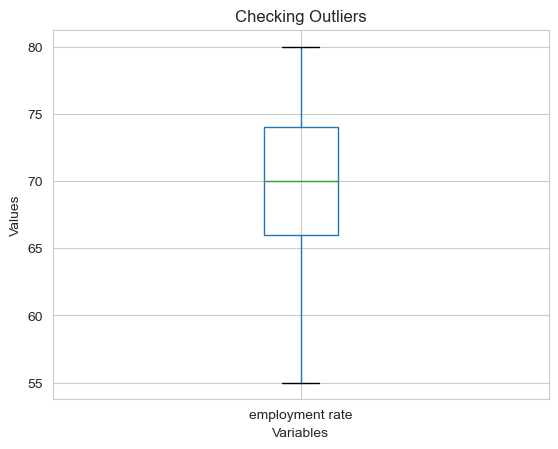

In [28]:
life.boxplot(column=['employment rate'])
plt.title('Checking Outliers')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()

We do not need to clean the outliers in the other columns since those are qualitative columns in reality and were already taken between the fixed range, the decribe function shows the minimum and maximum values in those columns and it does not exceed the range, hence, those are not outliers

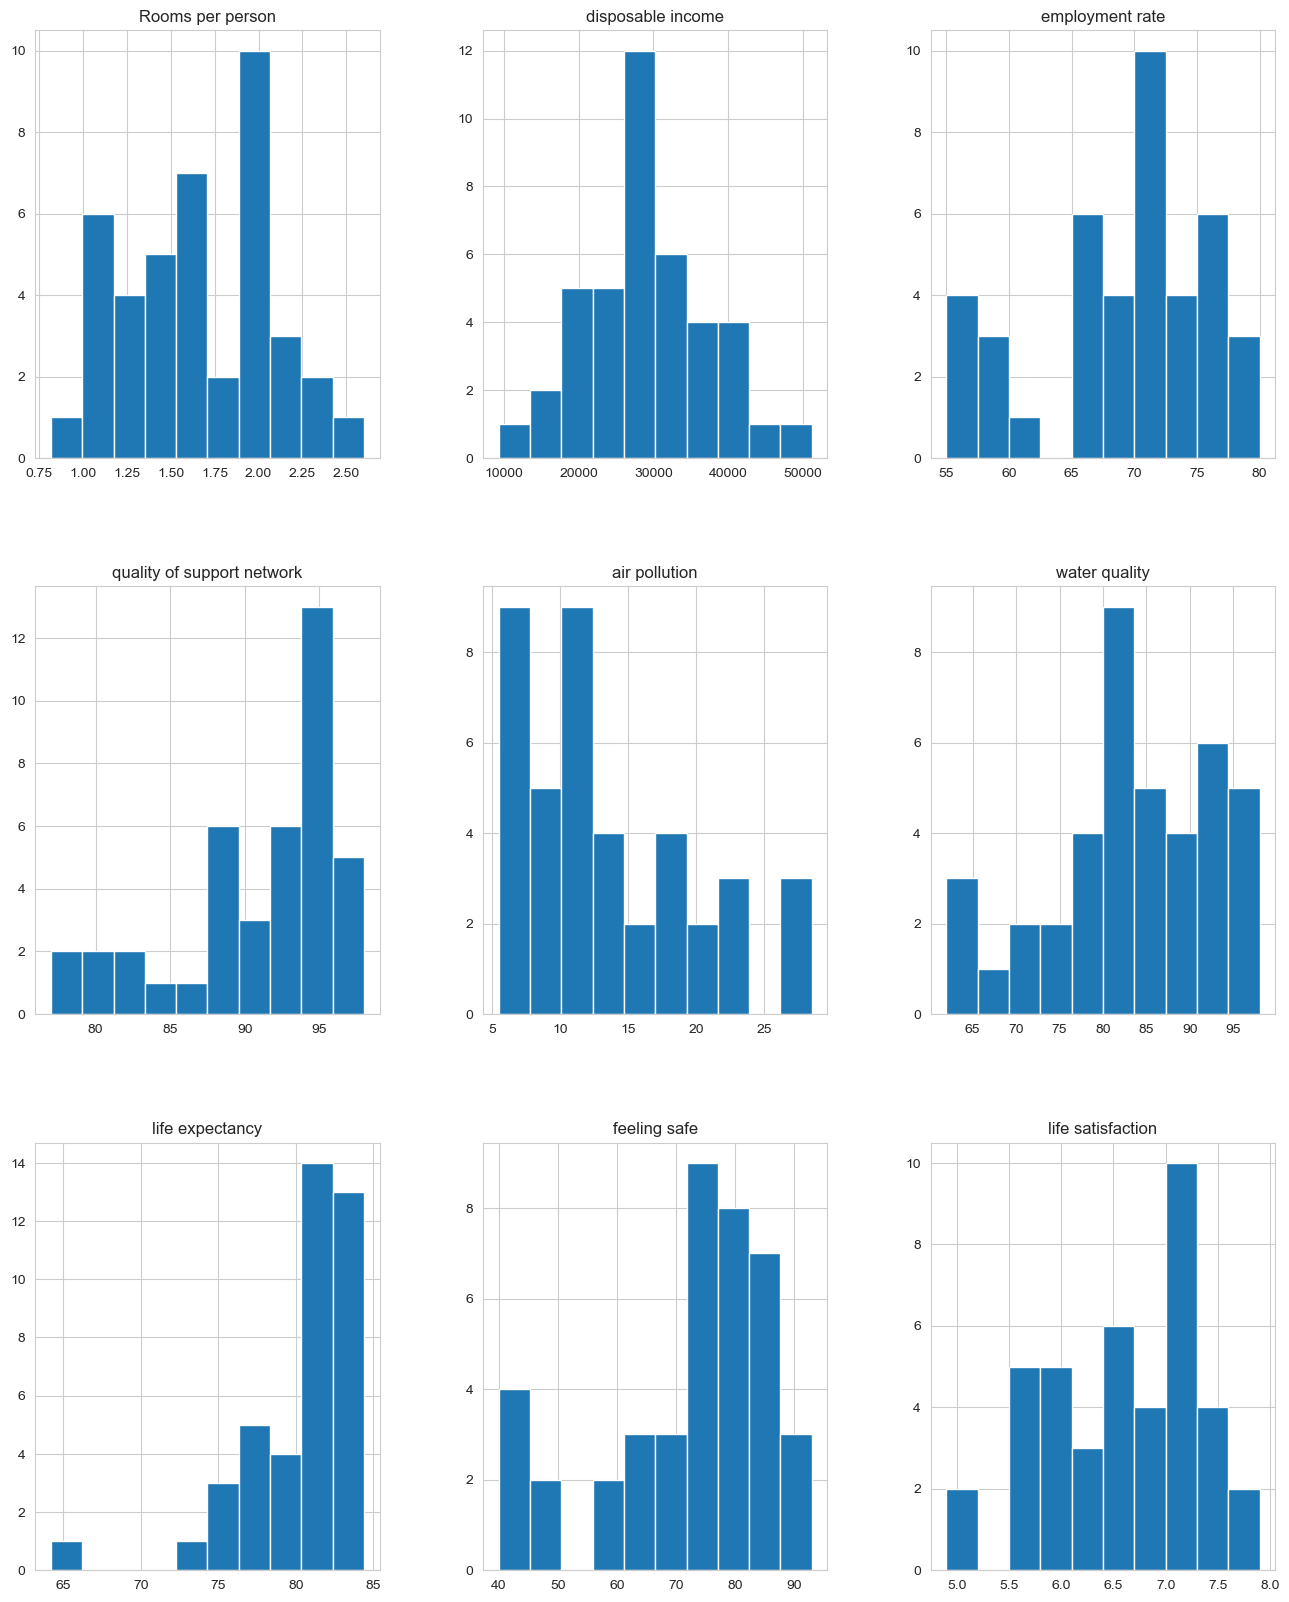

In [29]:
life.hist(figsize=(16,20))
plt.show()

None of the columns are normally distributed, to prepare our data for regression, it has to be normally distributed, so we can use the Standard Scaler to make the mean zero and standard deviation 1.

In [30]:
from sklearn.preprocessing import StandardScaler
scaledlife=StandardScaler().fit_transform(life[['Rooms per person','disposable income','employment rate','quality of support network','air pollution','water quality','life expectancy','feeling safe']])
scaledlife= pd.DataFrame(scaledlife,columns=['Rooms per person','disposable income','employment rate','quality of support network','air pollution','water quality','life expectancy','feeling safe'])
scaledlife.head()

Rooms per person  disposable income  employment rate  \
0          0.830831           0.974483         0.600250   
1         -0.107786           0.921064         0.451097   
2          1.066896           0.659287        -0.592974   
3          2.241577           0.602035         0.152791   
4          0.597023          -0.015001        -1.935352   

   quality of support network  air pollution  water quality  life expectancy  \
0                    0.417449      -1.078225       0.904433         0.721163   
1                    0.229367      -0.207381       0.904433         0.457871   
2                   -0.146795      -0.112379      -0.449676         0.484200   
3                    0.417449      -1.014891       0.696109         0.484200   
4                   -0.522958       1.565975      -2.220435         0.089262   

   feeling safe  
0     -0.359192  
1      0.986052  
2     -1.138018  
3      0.419633  
4     -2.200053

# Problem!
 If we predict Life satisfaction using numerical scores, it will be harder for the general public to understand and it will be harder to generalise. We want outcomes that can be directly interpreted.
<br>
Thus, we need to convert the life satisfaction variable into a categorical variable. The Advantages of doing the same are: <br>
1. Ease of Interpretation -  Categorizing life satisfaction scores simplifies the understanding for the general public. People find it easier to relate to labels like “satisfied” or “not satisfied” rather than interpreting numerical scores.
2. Communicating Insights - When presenting results to stakeholders, policymakers, or the public, categorical labels provide a clearer picture of the overall well-being. It’s more intuitive to say, “Most people are satisfied with their lives,” rather than discussing average numerical scores.
3. Robustness - Categorical labels are less sensitive to small variations in scores. Even if a person’s life satisfaction score changes slightly, their category remains the same, providing more robust insights.
4. Model Stability - When building predictive models, categorization can stabilize the model. Predicting exact numerical scores can be challenging due to noise, outliers, and model complexity. Categorical outcomes are more stable. 
<br>
The scores can be converted into five categories, the highest recorded score is 7.9 which can be attributed as "satisfied", while the lowest is 4.9 which can be attributed as "Unsatisfied".

In [31]:
def categorize_life_satisfaction(score):
    if score < 6.3:
        return "Unsatisfied"
    elif 6.3 <= score < 7.2:
        return "Moderate"
    else:
        return "Satisfied"

life['life satisfaction'] = life['life satisfaction'].apply(categorize_life_satisfaction)
life.head()

C:\Users\geete\AppData\Local\Temp\ipykernel_5860\3476282460.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life['life satisfaction'] = life['life satisfaction'].apply(categorize_life_satisfaction)


Country  Rooms per person  disposable income  employment rate  \
0  Australia           1.99952            37433.0               73   
1    Austria           1.60000            37001.0               72   
2    Belgium           2.10000            34884.0               65   
3     Canada           2.60000            34421.0               70   
4      Chile           1.90000            29431.0               56   

   quality of support network  air pollution  water quality  life expectancy  \
0                          93            6.7             92             83.0   
1                          92           12.2             92             82.0   
2                          90           12.8             79             82.1   
3                          93            7.1             90             82.1   
4                          88           23.4             62             80.6   

   feeling safe life satisfaction  
0            67          Moderate  
1            86         Satisfied  
2            56          Moderate  
3            78          Moderate  
4            41       Unsatisfied

In [32]:
print(life['life satisfaction'].value_counts())

Moderate       15
Unsatisfied    14
Satisfied      12
Name: life satisfaction, dtype: int64


In [33]:
#Creating dummy variables
mapx={'Unsatisfied':0,'Moderate':1,'Satisfied':2}
life['life satisfaction']=life['life satisfaction'].map(mapx)
life.head()

C:\Users\geete\AppData\Local\Temp\ipykernel_5860\306440493.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life['life satisfaction']=life['life satisfaction'].map(mapx)


Country  Rooms per person  disposable income  employment rate  \
0  Australia           1.99952            37433.0               73   
1    Austria           1.60000            37001.0               72   
2    Belgium           2.10000            34884.0               65   
3     Canada           2.60000            34421.0               70   
4      Chile           1.90000            29431.0               56   

   quality of support network  air pollution  water quality  life expectancy  \
0                          93            6.7             92             83.0   
1                          92           12.2             92             82.0   
2                          90           12.8             79             82.1   
3                          93            7.1             90             82.1   
4                          88           23.4             62             80.6   

   feeling safe  life satisfaction  
0            67                  1  
1            86                  2  
2            56                  1  
3            78                  1  
4            41                  0

# Final EDA

<AxesSubplot:xlabel='life satisfaction', ylabel='count'>

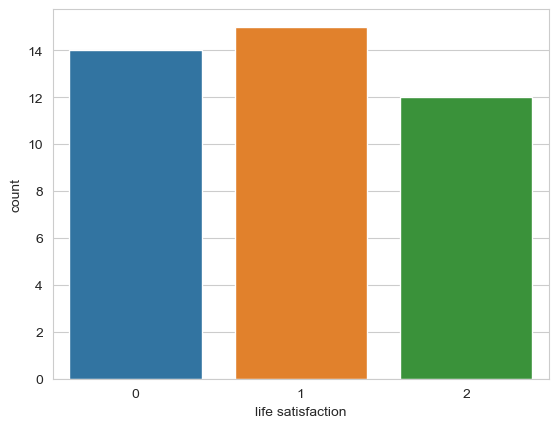

In [34]:
sns.set_style("whitegrid")
sns.countplot(x='life satisfaction',data=life)

Maximum number of countries have moderate Life Satisfaction and minimum number of countries are very unsatisfied.

In [35]:
import plotly.graph_objs as go
import plotly.express as px

# Create a choropleth map using Plotly Express
fig = px.choropleth(life, 
                    locations='Country', 
                    locationmode='country names', 
                    color='life satisfaction',
                    color_continuous_scale='magma',  # Adjust color scale as needed
                    range_color=[life['life satisfaction'].min(), life['life satisfaction'].max()],  # Set the range of colors
                    labels={'life satisfaction': 'Life Satisfaction Score'},
                    hover_data=['Country'],  # Show country names on hover
                    title='Life Satisfaction Scores by Country',
                    projection='natural earth'  # Set projection
                    )
fig.update_layout(geo=dict(showcoastlines=True, showframe=False))
fig.show()


Above countries are now grouped by their life satisfaction scores, by the same color

In [36]:
import plotly.graph_objs as go
import plotly.express as px

# Create a choropleth map using Plotly Express
fig = px.choropleth(df, 
                    locations='Country', 
                    locationmode='country names', 
                    color='life satisfaction',
                    color_continuous_scale='Viridis',  # Adjust color scale as needed
                    range_color=[df['life satisfaction'].min(), df['life satisfaction'].max()],  # Set the range of colors
                    labels={'life satisfaction': 'Life Satisfaction Score'},
                    hover_data=['Country'],  # Show country names on hover
                    title='Life Satisfaction Scores by Country',
                    projection='natural earth'  # Set projection
                    )
fig.update_layout(geo=dict(showcoastlines=True, showframe=False))
fig.show()

Above graph is made with the old data, it is harder to understand the scores of countries here.

The Life Satisfaction increases with increase in Water Quality

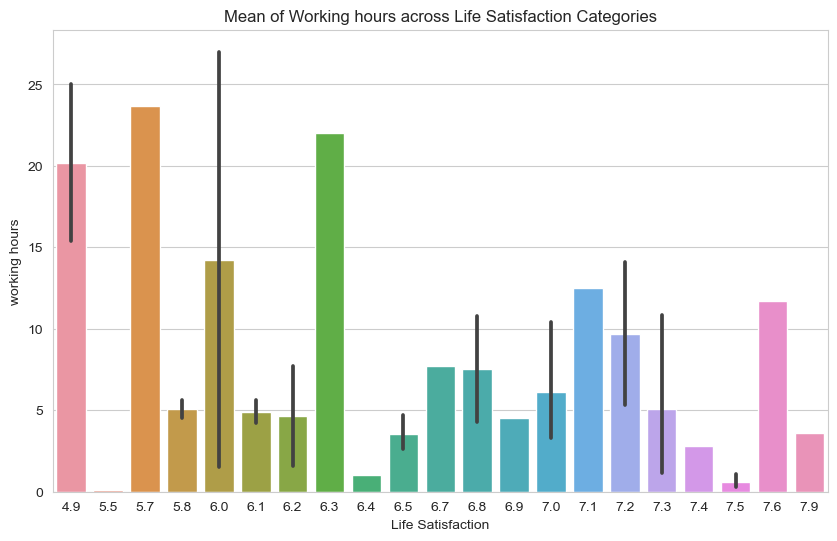

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x='life satisfaction', y='working hours', data=df)
plt.title('Mean of Working hours across Life Satisfaction Categories')
plt.xlabel('Life Satisfaction')
plt.ylabel('working hours')
plt.show()

From the above graph we can't really say that the Life satisfaction increases with increase in working hours. Hence, it is not included in the model.

# Model Building
Also, after model comparison it was found that the accuracy of Logistic regression and SVM (after hyperparameter tuning) was the same ,that is , 76.92 and the other models had a lower accuracy in both cases. hence, we have chosen to go for Logistic Regression. <br>
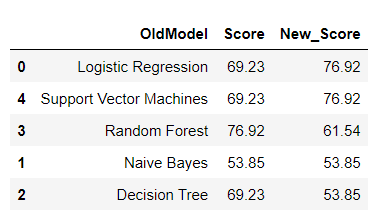 <br>
To predict the life satisfaction , we have to build a logistic regression model. <br>
Since there are less number of observations, cross validation will be apt. <br>

In [38]:
#Preparing the Data  
#removing country variable since it is an identifier
life.drop(['Country'],axis=1,inplace=True)
life.head()
X=scaledlife
Y=life['life satisfaction']

C:\Users\geete\AppData\Local\Temp\ipykernel_5860\2964657183.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
X.head()

Rooms per person  disposable income  employment rate  \
0          0.830831           0.974483         0.600250   
1         -0.107786           0.921064         0.451097   
2          1.066896           0.659287        -0.592974   
3          2.241577           0.602035         0.152791   
4          0.597023          -0.015001        -1.935352   

   quality of support network  air pollution  water quality  life expectancy  \
0                    0.417449      -1.078225       0.904433         0.721163   
1                    0.229367      -0.207381       0.904433         0.457871   
2                   -0.146795      -0.112379      -0.449676         0.484200   
3                    0.417449      -1.014891       0.696109         0.484200   
4                   -0.522958       1.565975      -2.220435         0.089262   

   feeling safe  
0     -0.359192  
1      0.986052  
2     -1.138018  
3      0.419633  
4     -2.200053

In [40]:
Y.head()

0    1
1    2
2    1
3    1
4    0
Name: life satisfaction, dtype: int64

In [41]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=100)

In [42]:
logmodel = LogisticRegression()

In [43]:
cv_scores = cross_val_score(logmodel, X_train, Y_train, cv=8, scoring='accuracy')

# cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation of Accuracy:", cv_scores.std())

Cross-Validation Scores: [0.75       0.5        0.75       0.25       0.66666667 0.66666667
 0.33333333 1.        ]
Mean Accuracy: 0.6145833333333333
Standard Deviation of Accuracy: 0.22797988154415927


In [44]:
logmodel.fit(X_train, Y_train)

LogisticRegression()

In [45]:
predictions = logmodel.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.20      0.33         5
           2       0.50      1.00      0.67         2

    accuracy                           0.69        13
   macro avg       0.75      0.73      0.62        13
weighted avg       0.81      0.69      0.63        13



We cannot make a roc-auc curve since the classification is not binary.

In [46]:
train_score = logmodel.score(X_train, Y_train)
test_score = logmodel.score(X_test, Y_test)
print("Training Score (Accuracy):", train_score)
print("Testing Score (Accuracy):", test_score)

Training Score (Accuracy): 0.8928571428571429
Testing Score (Accuracy): 0.6923076923076923


There is a variance of<b> 0.20</b> in our accuracy scores which implies overfitting, our model will not perform well with unseen data.

<b> Mitigating overfitting </b>
Since there is overfitting, we need to reduce some variables, because this might be happening because we have alot of independent variables in our model. This is making the model more complex than necessary.<br>
We are only going to drop three less correlated variables from our previous feature selection.<br>
Life satisfaction and it's correlation with previously selected variable: 
1. rooms per person (0.63)
2. air pollution (-0.69)
3. life expectancy (0.63)
<br><br>
Though there are other variables which have less correlation from our selected variables, we are not dropping them since they have domain significance.

In [47]:
scaledlife.drop(['Rooms per person','life expectancy','air pollution'],axis=1,inplace=True)

In [48]:
X=scaledlife
Y=life['life satisfaction']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=100)
logmodel = LogisticRegression()
cv_scores = cross_val_score(logmodel, X_train, Y_train, cv=8, scoring='accuracy')

# cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation of Accuracy:", cv_scores.std())

Cross-Validation Scores: [0.5        0.5        1.         0.25       0.66666667 1.
 0.66666667 0.66666667]
Mean Accuracy: 0.65625
Standard Deviation of Accuracy: 0.23730803645613577


In [49]:
logmodel.fit(X_train, Y_train)
predictions = logmodel.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.40      0.57         5
           2       0.50      1.00      0.67         2

    accuracy                           0.77        13
   macro avg       0.79      0.80      0.72        13
weighted avg       0.86      0.77      0.75        13



<b> Interpretation of Classification report <b/> <br>

Precision-
Precision measures the accuracy of positive predictions made by the model. <br>
Precision for class 0 is 0.86, indicating that 86% of instances predicted as belonging to class 0 are actually members of class 0.<br>
Precision for class 1 is 1.00, suggesting that all instances predicted as belonging to class 1 are indeed members of class 1.<br>
Precision for class 2 is 0.50, implying that 50% of instances predicted as belonging to class 2 are actually members of class 2.
 
Recall (also known as sensitivity)-
Recall measures the ability of the model to correctly identify all true positives for each class.<br>
Recall for class 0 is 1.00, indicating that the model correctly identifies all instances of class 0 among all actual instances of class 0.<br>
Recall for class 1 is 0.40, suggesting that only 40% of instances of class 1 are correctly identified by the model.<br>
Recall for class 2 is 1.00, indicating that all instances of class 2 are correctly identified by the model.<br>
    
F1-Score-
F1-score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall.
F1-score ranges from 0 to 1, with higher values indicating better model performance.<br>
F1-score for class 0 is 0.92, suggesting a good balance between precision and recall for class 0.<br>
F1-score for class 1 is 0.57, indicating that precision and recall are not equally balanced for class 1.<br>
F1-score for class 2 is 0.67, suggesting a moderate balance between precision and recall for class 2.<br>
    
Support-
Support refers to the number of actual occurrences of each class in the dataset.<br>
Class 0 has a support of 6, meaning there are 6 instances of class 0 in the training data.<br>
Class 1 has a support of 5, indicating there are 5 instances of class 1.<br>
Class 2 has a support of 2, implying there are 2 instances of class 2.

In [50]:
train_score = logmodel.score(X_train, Y_train)
test_score = logmodel.score(X_test, Y_test)
print("Training Score (Accuracy):", train_score)
print("Testing Score (Accuracy):", test_score)

Training Score (Accuracy): 0.7857142857142857
Testing Score (Accuracy): 0.7692307692307693


<b>Now, there is no overfitting in our model :)</b>
***